# K Nearest Neighbor Algorithm K = 1 and K = 3

#### Author: Manjiri Harishchandra Sawant

### Importing necessary libraries

The following code written in python 3.x. Libraries provide pre-written functionally to perform necessary tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
b_cancer = pd.read_csv('C:/Users/Public/Documents/wdbc_cancerdata.csv', header = None)

In [3]:
#print number of rows and number of columns of data
b_cancer.shape

(569, 32)

In [4]:
#assigning column names to respective columns
b_cancer.columns = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10',
                    'col11','col12','col13','col14','col15','col16','col17','col18','col19','col20',
                    'col21','col22','col23','col24','col25','col26','col27','col28','col29',
                    'col30','col31','col32']

In [5]:
# print first five rows of the data
b_cancer.head(5)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Removing Unnecessary column
b_cancer.drop(['col1'], axis = 1, inplace=True)

In [7]:
# separate numeric and categorical data 
numeric_data = b_cancer.select_dtypes(include = np.number)
categoric_data = b_cancer.select_dtypes(exclude = np.number)

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
scaler = StandardScaler()
data_scaled_n = scaler.fit_transform(numeric_data)

In [10]:
#Initialize Label Encoder
le = LabelEncoder()
data_scaled_c = le.fit_transform(categoric_data)

In [11]:
#separate features as 'x' and target as a 'y'
x = pd.DataFrame(data_scaled_n)
y = pd.DataFrame(data_scaled_c)
x.shape , y.shape

((569, 30), (569, 1))

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knn = KNeighborsRegressor()

In [14]:
knn.fit(x,y)

KNeighborsRegressor()

In [15]:
#Import the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state = 56, stratify = y)

In [16]:
#importing knn classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

#### 1NN Prediction Rule (that NN defined as the special case of KNN with k = 1) for both classification or regression

In [17]:
#Creating instances of KNN
clf1 = KNN(n_neighbors = 1, weights = 'distance')

#Fitting the model
clf1.fit(train_x, train_y)

#Predicting over the Train Set and calculating F1
test_predict_1 = clf1.predict(test_x)
k_1 = f1_score(test_predict_1, test_y)
print('Test F1 score  ', k_1 )

Test F1 score   0.9245283018867925


#### 3NN Prediction Rule ( KNN with k = 3) for both classification or regression

In [18]:
#Creating instances of KNN
clf2 = KNN(n_neighbors = 3, weights = 'distance')

#Fitting the model
clf2.fit(train_x, train_y)

#Predicting over the Train Set and calculating F1
test_predict_2 = clf2.predict(test_x)
k_2 = f1_score(test_predict_2, test_y)
print('Test F1 score  ', k_2 )

Test F1 score   0.9320388349514563


### Elbow for classifier

In [19]:
def Elbow(K):
    #initiating empty list
    test_error = []
    
    #training model for every value of K
    for i in K:
        #Instance of KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        #append F1 score to empty list calculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        error = 1 - tmp
        test_error.append(error)
    return test_error

In [20]:
#Defining K range
k = (1,3,1)

In [21]:
#calling above defined function 
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

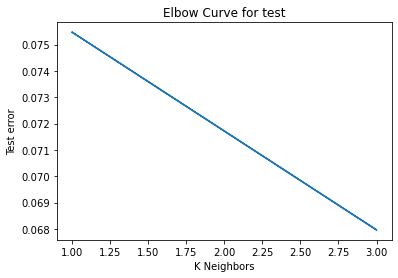

In [22]:
#plotting the curves
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')